In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, joblib
print("Libraries imported!!")

Libraries imported!!


In [70]:
data_file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df = pd.read_csv(data_file_path)
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [71]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [72]:
df = df.dropna() # drops or removes missing or null values of every column
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [73]:
male = df[df['Gender'] == 'Male']
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [74]:
female = df[df['Gender'] == 'Female']
female['Customer Type'].value_counts()
female['Class'].value_counts()

Class
Business    24868
Eco         23776
Eco Plus     3932
Name: count, dtype: int64

In [75]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [76]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [77]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [78]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

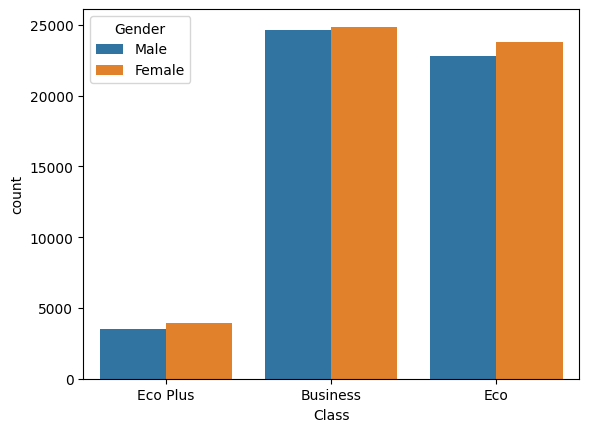

In [79]:
# Difference between Countplot and Barplot:

#  ==> countplot is used to plot the frequency (count) of categories in a categorical variable. It does not require any numerical data and is primarily used for counting how often each category occurs.

# ==> barplot is used to compare the aggregate value of a numerical variable across different categories. It requires both a categorical variable and a numerical variable and is used when you want to visualize and compare the central tendency or distribution of a numerical variable across categories.

# Hue is used to categorically color the occurences

sns.countplot(x='Class',data=df,hue='Gender')
plt.show()

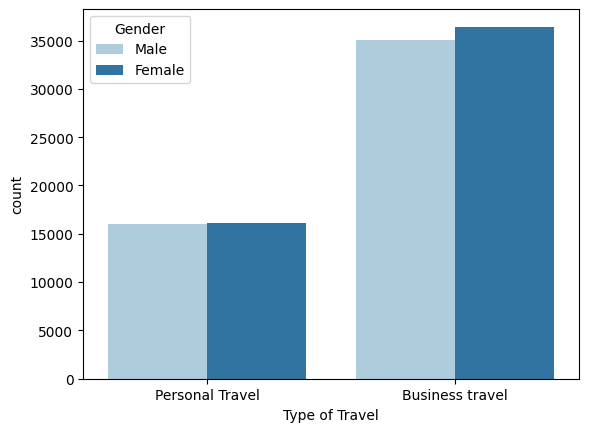

In [80]:
sns.countplot(x='Type of Travel',data=df,hue='Gender',palette="Paired")
plt.show()

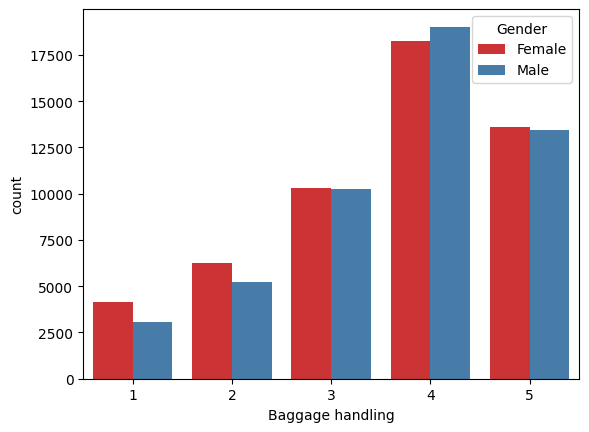

In [81]:
sns.countplot(x='Baggage handling',data=df,hue='Gender',palette="Set1")
plt.show()

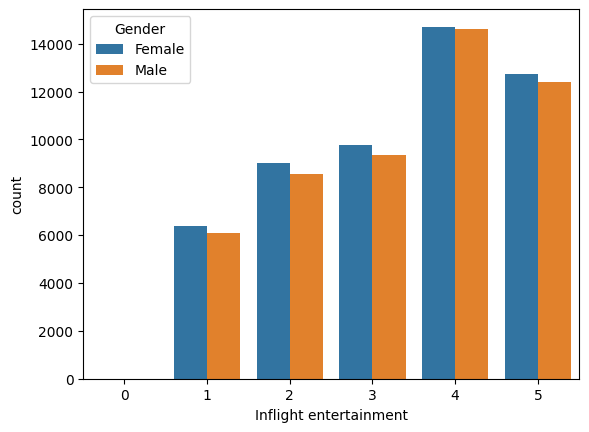

In [82]:
sns.countplot(data=df,x='Inflight entertainment',hue='Gender')
plt.show()

In [83]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [84]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [85]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [86]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [87]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [88]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [90]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first').set_output(transform='pandas')
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [91]:
df2 = ohe.fit_transform(df[['Gender','Customer Type','Type of Travel','Class','satisfaction']])
df2

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
103899,0.0,1.0,0.0,1.0,0.0,0.0
103900,1.0,0.0,0.0,0.0,0.0,1.0
103901,1.0,1.0,0.0,0.0,0.0,0.0
103902,0.0,1.0,0.0,1.0,0.0,0.0


In [92]:
df2 = pd.concat([df2,df], axis=1).drop(columns= ['Gender','Customer Type','Type of Travel','Class','satisfaction'])
df2.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,5,4,5,25,18.0
1,1.0,1.0,0.0,0.0,0.0,0.0,25,235,1,3,1,1,6.0
2,0.0,0.0,0.0,0.0,0.0,1.0,26,1142,5,4,5,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,25,562,2,3,2,11,9.0
4,1.0,0.0,0.0,0.0,0.0,1.0,61,214,3,4,3,0,0.0


In [95]:
x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]
x.head()
y.head()

,satisfaction_satisfied
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [96]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_test

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
68127,1.0,1.0,0.0,1.0,0.0,22,562,3,3,3,0,6.0
10419,0.0,0.0,0.0,0.0,0.0,41,1573,5,5,4,0,0.0
9144,1.0,0.0,0.0,1.0,0.0,38,170,5,2,5,0,0.0
61835,0.0,0.0,0.0,0.0,0.0,41,2259,5,5,3,112,102.0
98637,1.0,0.0,0.0,0.0,0.0,44,2619,5,5,3,18,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47730,1.0,0.0,1.0,1.0,0.0,49,529,4,4,4,119,111.0
30621,0.0,0.0,0.0,0.0,0.0,51,3807,2,4,3,1,0.0
37241,0.0,0.0,0.0,0.0,0.0,46,259,4,4,5,0,0.0
36264,0.0,0.0,0.0,1.0,0.0,44,2355,4,4,4,15,3.0


In [99]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [103]:
print(f"Training score: {lgr.score(x_train,y_train)*100}")
print(f"Testing score: {lgr.score(x_test,y_test)*100}")

Training score: 79.2422322775264
Testing score: 79.17370529465708
